<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/5/58/Uber_logo_2018.svg/1024px-Uber_logo_2018.svg.png" alt="UBER LOGO" width="50%" />

# UBER Pickups 

## Company's Description 📇

<a href="http://uber.com/" target="_blank">Uber</a> is one of the most famous startup in the world. It started as a ride-sharing application for people who couldn't afford a taxi. Now, Uber expanded its activities to Food Delivery with <a href="https://www.ubereats.com/fr-en" target="_blank">Uber Eats</a>, package delivery, freight transportation and even urban transportation with <a href="https://www.uber.com/fr/en/ride/uber-bike/" target="_blank"> Jump Bike</a> and <a href="https://www.li.me/" target="_blank"> Lime </a> that the company funded. 


The company's goal is to revolutionize transportation accross the globe. It operates now on about 70 countries and 900 cities and generates over $14 billion revenue! 😮


## Project 🚧

One of the main pain point that Uber's team found is that sometimes drivers are not around when users need them. For example, a user might be in San Francisco's Financial District whereas Uber drivers are looking for customers in Castro.  

(If you are not familiar with the bay area, check out <a href="https://www.google.com/maps/place/San+Francisco,+CA,+USA/@37.7515389,-122.4567213,13.43z/data=!4m5!3m4!1s0x80859a6d00690021:0x4a501367f076adff!8m2!3d37.7749295!4d-122.4194155" target="_blank">Google Maps</a>)

Eventhough both neighborhood are not that far away, users would still have to wait 10 to 15 minutes before being picked-up, which is too long. Uber's research shows that users accept to wait 5-7 minutes, otherwise they would cancel their ride. 

Therefore, Uber's data team would like to work on a project where **their app would recommend hot-zones in major cities to be in at any given time of day.**  

## Goals 🎯

Uber already has data about pickups in major cities. Your objective is to create algorithms that will determine where are the hot-zones that drivers should be in. Therefore you will:

* Create an algorithm to find hot zones 
* Visualize results on a nice dashboard 

## Scope of this project 🖼️

To start off, Uber wants to try this feature in New York city. Therefore you will only focus on this city. Data can be found here: 

👉👉<a href="https://full-stack-bigdata-datasets.s3.eu-west-3.amazonaws.com/Machine+Learning+non+Supervis%C3%A9/Projects/uber-trip-data.zip" target="_blank"> Uber Trip Data</a> 👈👈

**You only need to focus on New York City for this project**

## Helpers 🦮

To help you achieve this project, here are a few tips that should help you: 

### Clustering is your friend 

Clustering technics are a perfect fit for the job. Think about it, all the pickup locations can be gathered into different clusters. You can then use **cluster coordinates to pin hot zones** 😉
    

### Create maps with `plotly` 

Check out <a href="https://plotly.com/" target="_blank">Plotly</a> documentation, you can create maps and populate them easily. Obviously, there are other libraries but this one should do the job pretty well. 


### Start small grow big 

Eventhough Uber wants to have hot-zones per hour and per day of week, you should first **start small**. Pick one day at a given hour and **then start to generalize** your approach. 

## Deliverable 📬

To complete this project, your team should: 

* Have a map with hot-zones using any python library (`plotly` or anything else). 
* You should **at least** describe hot-zones per day of week. 
* Compare results with **at least** two unsupervised algorithms like KMeans and DBScan. 

Your maps should look something like this: 

<img src="https://full-stack-assets.s3.eu-west-3.amazonaws.com/images/Clusters_uber_pickups.png" alt="Uber Cluster Map" />

In [49]:
!pip install plotly==4.9.0

In [36]:
# import des librairies
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import  OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression, Ridge

In [37]:
# création du Dataframe 
zones = pd.read_csv('taxi-zone-lookup.csv')

In [38]:
zones

,LocationID,Borough,Zone
0,1,EWR,Newark Airport
1,2,Queens,Jamaica Bay
2,3,Bronx,Allerton/Pelham Gardens
3,4,Manhattan,Alphabet City
4,5,Staten Island,Arden Heights
...,...,...,...
260,261,Manhattan,World Trade Center
261,262,Manhattan,Yorkville East
262,263,Manhattan,Yorkville West
263,264,Unknown,Unknown


In [40]:
# chargement des données d'Avril
april = pd.read_csv('uber-raw-data-apr14.csv')

In [41]:
april

,Date/Time,Lat,Lon,Base
0,4/1/2014 0:11:00,40.7690,-73.9549,B02512
1,4/1/2014 0:17:00,40.7267,-74.0345,B02512
2,4/1/2014 0:21:00,40.7316,-73.9873,B02512
3,4/1/2014 0:28:00,40.7588,-73.9776,B02512
4,4/1/2014 0:33:00,40.7594,-73.9722,B02512
...,...,...,...,...
564511,4/30/2014 23:22:00,40.7640,-73.9744,B02764
564512,4/30/2014 23:26:00,40.7629,-73.9672,B02764
564513,4/30/2014 23:31:00,40.7443,-73.9889,B02764
564514,4/30/2014 23:32:00,40.6756,-73.9405,B02764


In [9]:
april.Base.value_counts()

B02682    227808
B02598    183263
B02617    108001
B02512     35536
B02764      9908
Name: Base, dtype: int64

In [10]:
april.isna().sum()

Date/Time    0
Lat          0
Lon          0
Base         0
dtype: int64

In [11]:
import datetime as dt

In [42]:
# conversion de la date au bon format
x= '4/1/2014 0:11:00'
april['date'] = pd.to_datetime(april['Date/Time'])
april

,Date/Time,Lat,Lon,Base,date
0,4/1/2014 0:11:00,40.7690,-73.9549,B02512,2014-04-01 00:11:00
1,4/1/2014 0:17:00,40.7267,-74.0345,B02512,2014-04-01 00:17:00
2,4/1/2014 0:21:00,40.7316,-73.9873,B02512,2014-04-01 00:21:00
3,4/1/2014 0:28:00,40.7588,-73.9776,B02512,2014-04-01 00:28:00
4,4/1/2014 0:33:00,40.7594,-73.9722,B02512,2014-04-01 00:33:00
...,...,...,...,...,...
564511,4/30/2014 23:22:00,40.7640,-73.9744,B02764,2014-04-30 23:22:00
564512,4/30/2014 23:26:00,40.7629,-73.9672,B02764,2014-04-30 23:26:00
564513,4/30/2014 23:31:00,40.7443,-73.9889,B02764,2014-04-30 23:31:00
564514,4/30/2014 23:32:00,40.6756,-73.9405,B02764,2014-04-30 23:32:00


In [43]:
april['day'] = april['date'].dt.day
april['time'] = april['date'].dt.hour

In [46]:
# filtre sur les rides du premier jour du mois 
df1 = april[april['day'] == 1]
df1

,Date/Time,Lat,Lon,Base,date,day,time
0,4/1/2014 0:11:00,40.7690,-73.9549,B02512,2014-04-01 00:11:00,1,0
1,4/1/2014 0:17:00,40.7267,-74.0345,B02512,2014-04-01 00:17:00,1,0
2,4/1/2014 0:21:00,40.7316,-73.9873,B02512,2014-04-01 00:21:00,1,0
3,4/1/2014 0:28:00,40.7588,-73.9776,B02512,2014-04-01 00:28:00,1,0
4,4/1/2014 0:33:00,40.7594,-73.9722,B02512,2014-04-01 00:33:00,1,0
...,...,...,...,...,...,...,...
554926,4/1/2014 23:21:00,40.7219,-73.9920,B02764,2014-04-01 23:21:00,1,23
554927,4/1/2014 23:25:00,40.7261,-74.0027,B02764,2014-04-01 23:25:00,1,23
554928,4/1/2014 23:38:00,40.7364,-73.9926,B02764,2014-04-01 23:38:00,1,23
554929,4/1/2014 23:41:00,40.7149,-73.9405,B02764,2014-04-01 23:41:00,1,23


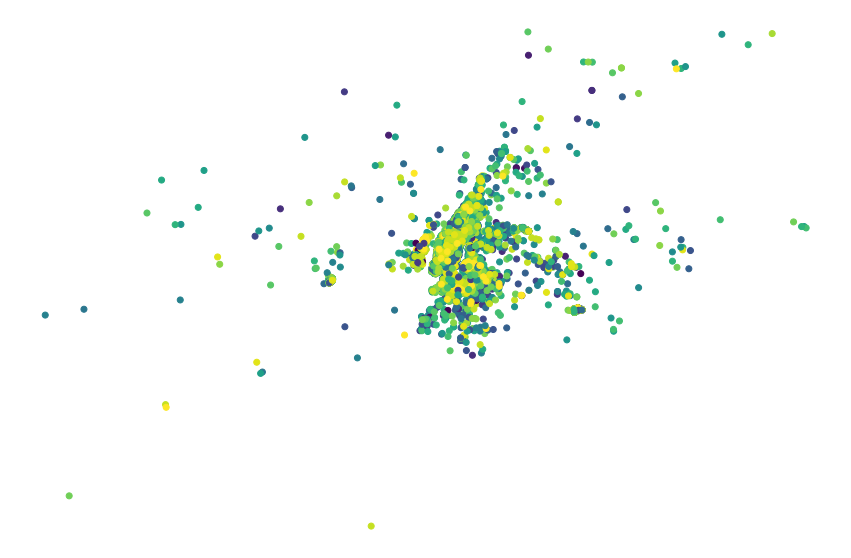

In [47]:
# Affichage sur une carte
import seaborn as sns
from matplotlib import pyplot as plt

plt.figure(figsize=(15, 10))
plt.scatter(x='Lon', y='Lat', data=df1, c='time')
plt.axis('off')
plt.show()

In [52]:
# affichage sur carte
import plotly.express as px

fig = px.scatter_mapbox(df1, lat="Lat", lon="Lon", color='time', zoom=10, mapbox_style="carto-positron")
fig.show("iframe")

In [53]:
from sklearn.cluster import KMeans

In [117]:
X=df1[['Lat', 'Lon']]

In [107]:
# Import Standard Scaler
from sklearn.preprocessing import StandardScaler

# Initialize StandardScaler
# StandardScaler will substract mean and divide by standard deviation to each observation
sc = StandardScaler()

# Apply StandardScaler to X
X = sc.fit_transform(X)

# Visualize first five rows 
# Standard scaler transform X as numpy array. Therefore you can't use .head()
X[:5]

# !!! ne pas faire de standard scaler dans ce cas !!! impact sur l'execution du code suivant car X ne sera plus un DF

array([[ 0.7672978 ,  0.41505401],
       [-0.38027247, -1.10899284],
       [-0.2473388 , -0.20528667],
       [ 0.49057872, -0.01956739],
       [ 0.50685632,  0.08382272]])

In [118]:
kmeans =  KMeans(n_clusters= 3, init = "k-means++", random_state = 0)
kmeans.fit(X)

KMeans(n_clusters=3, random_state=0)

In [119]:
X["cluster"] = kmeans.predict(X)

/tmp/ipykernel_127/2738750412.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [120]:
cluster_centers = sc.inverse_transform(kmeans.cluster_centers_)

In [121]:
cluster_centers

array([[ 42.24334659, -77.84014685],
       [ 42.24167454, -77.83200392],
       [ 42.24164283, -77.84145055]])

In [122]:
fig = px.scatter_mapbox(X, lat="Lat", lon="Lon", color= "cluster" , zoom=10, mapbox_style="carto-positron")
fig.show("iframe")

In [123]:
X=df1[['Lat', 'Lon']]

In [124]:
def train_kmeans(X, k_init=1, k_end=12):
    wcss =  []
    k = []
    for i in range (k_init,k_end): 
        kmeans = KMeans(n_clusters= i, init = "k-means++", random_state = 0)
        kmeans.fit(X)
        wcss.append(kmeans.inertia_)
        k.append(i)
        print("WCSS for K={} --> {}".format(i, wcss[-1]))
    return wcss

In [125]:
wcss = train_kmeans(X)

WCSS for K=1 --> 59.44371542664514
WCSS for K=2 --> 37.7128083738005
WCSS for K=3 --> 28.321343931895036
WCSS for K=4 --> 20.89571128178059
WCSS for K=5 --> 15.87539281299249
WCSS for K=6 --> 12.822573252255047
WCSS for K=7 --> 10.89790013926833
WCSS for K=8 --> 9.576220172129494
WCSS for K=9 --> 8.635591434579693
WCSS for K=10 --> 7.72244001464494
WCSS for K=11 --> 6.928455457530953


In [126]:
# Let's visualize using plotly
#k=11
# Create DataFrame
wcss_frame = pd.DataFrame(wcss)
k_frame = pd.Series(range(11))

# Create figure
fig= px.line(
    wcss_frame,
    x=k_frame,
    y=wcss_frame.iloc[:,-1]
)

# Create title and axis labels
fig.update_layout(
    yaxis_title="Inertia",
    xaxis_title="# Clusters",
    title="Inertia per cluster"
)
fig.show("iframe")

In [127]:
kmeans =  KMeans(n_clusters= 4, init = "k-means++", random_state = 0)
kmeans.fit(X)
X['cluster'] = kmeans.predict(X)

/tmp/ipykernel_127/284274262.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [128]:
def plot_map(X, cluster):
    fig = px.scatter_mapbox(X, lat="Lat", lon="Lon", color=cluster, zoom=10, mapbox_style="carto-positron")
    fig.show("iframe")

In [129]:
fig = px.scatter_mapbox(X, lat="Lat", lon="Lon", color='cluster', zoom=10, mapbox_style="carto-positron")
fig.show("iframe")

In [130]:
april['dayofweek'] = april['date'].dt.dayofweek

### Même exercice avec tous les tous les premiers jours de semaine

In [131]:
df2 = april[april['dayofweek'] == 1]
df2

,Date/Time,Lat,Lon,Base,date,day,time,dayofweek
0,4/1/2014 0:11:00,40.7690,-73.9549,B02512,2014-04-01 00:11:00,1,0,1
1,4/1/2014 0:17:00,40.7267,-74.0345,B02512,2014-04-01 00:17:00,1,0,1
2,4/1/2014 0:21:00,40.7316,-73.9873,B02512,2014-04-01 00:21:00,1,0,1
3,4/1/2014 0:28:00,40.7588,-73.9776,B02512,2014-04-01 00:28:00,1,0,1
4,4/1/2014 0:33:00,40.7594,-73.9722,B02512,2014-04-01 00:33:00,1,0,1
...,...,...,...,...,...,...,...,...
563905,4/29/2014 23:03:00,40.7033,-73.9906,B02764,2014-04-29 23:03:00,29,23,1
563906,4/29/2014 23:04:00,40.7339,-74.0050,B02764,2014-04-29 23:04:00,29,23,1
563907,4/29/2014 23:07:00,40.7246,-73.9934,B02764,2014-04-29 23:07:00,29,23,1
563908,4/29/2014 23:14:00,40.7019,-73.9778,B02764,2014-04-29 23:14:00,29,23,1


In [135]:
# choix de deux clusters
X1 = df2[['Lat', 'Lon']]
kmeans =  KMeans(n_clusters= 2, init = "k-means++", random_state = 0)
kmeans.fit(X1)
X1['cluster'] = kmeans.predict(X1)

/tmp/ipykernel_127/179666976.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [133]:
plot_map(X1, 'cluster')

### Même excercice pour chaque jour de la semaine

In [134]:
for d in april["dayofweek"].unique():
    X = april.loc[april["dayofweek"]==d,["Lat","Lon"]].sample(1000)#2
    kmeans =  KMeans(n_clusters= 4, init = "k-means++", random_state = 0)
    #kmeans = MiniBatchKMeans(4)
    kmeans.fit(X)

    # Create a sample of data to not have too many elements on the map
    #X = X.sample(1000)

    # Predict clusters on sample data
    X.loc[:,'cluster'] = kmeans.predict(X)
    plot_map(X, 'cluster')
    #fig = px.scatter_mapbox(X, lat="Lat", lon="Lon", color="cluster", zoom=10, mapbox_style="carto-positron")
    #fig.show()
